In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
a = pd.read_csv("modified_trainingset.csv")
a

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,38,0,1,4073
1,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,1,19
2,R,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,1,17
3,R,0,0,0,0,0,0,0,0,0,...,0,1,0,7,0,0,28,0,1,18
4,B,0,0,0,0,0,0,0,0,0,...,27,0,0,6,0,0,33,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,R,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,1,18,0,1,17
1996,R,0,0,0,0,0,0,0,1,1,...,8,1,0,15,1,0,120,0,1,1421
1997,B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25
1998,R,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3,0,23,0,1,20


In [35]:
c = pd.read_csv("TestingDatasetModified.csv")
c

,Classification,proc_pid,file,urls,type,name,ext_urls,path,program,info,...,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
2,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
3,B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
4,B,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,R,3.0,502.0,3.0,3.0,9.0,3.0,3.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,3.0,46.0,0.0,0.0,197.0
134,R,28.0,3766.0,28.0,10.0,9.0,10.0,10.0,4.0,0.0,...,1.0,986.0,64.0,21.0,16.0,542.0,805.0,0.0,1.0,781.0
135,R,2.0,371.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,32.0,0.0,0.0,24.0
136,R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,696.0,32.0,0.0,1.0,2.0,96.0,0.0,0.0,4694.0


In [23]:
#data cleaning 
x = a.drop('family', axis=1)

b = a['family']

y = c.drop('Classification', axis=1)
d = c['Classification']
y = y.drop(y.index[-1])
d = d.drop(d.index[-1])

In [37]:
#Random Forest 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x, b)
d_pred = rfc.predict(y)
accuracy = accuracy_score(d, d_pred)
print('Accuracy:', accuracy)
precision = precision_score(d, d_pred, pos_label="B")
print('Precision:', precision)
recall = recall_score(d, d_pred, pos_label="B")
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(d, d_pred, pos_label="B")
print('F1-score', f1)

Accuracy: 0.8467153284671532
Precision: 0.927536231884058
Recall: 0.8
F1-score 0.8590604026845639


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

#Gradient Boosting Classifier 
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x,b)

d_pred = gbc.predict(y)
accuracy = accuracy_score(d, d_pred)
print('Accuracy:', accuracy)

precision = precision_score(d, d_pred, pos_label="B")
print('Precision:', precision)

recall = recall_score(d, d_pred, pos_label="B")
print('Recall:', recall)

f1 = f1_score(d, d_pred, pos_label="B")
print('F1-score', f1)

Accuracy: 0.635036496350365
Precision: 0.7419354838709677
Recall: 0.575
F1-score 0.6478873239436619


In [7]:
#decision tree

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x, b)

d_pred = dtc.predict(y)
accuracy = accuracy_score(d, d_pred)
print('Accuracy:', accuracy)

precision = precision_score(d, d_pred, pos_label="B")
print('Precision:', precision)

recall = recall_score(d, d_pred, pos_label="B")
print('Recall:', recall)

f1 = f1_score(d, d_pred, pos_label="B")
print('F1-score', f1)

Accuracy: 0.6642335766423357
Precision: 0.6642335766423357
Recall: 0.6642335766423357
F1-score 0.6642335766423357


In [42]:
#svc
from sklearn.svm import SVC

svc = SVC(kernel='rbf', random_state=42)
svc.fit(x, b)

d_pred = svc.predict(y)
accuracy = accuracy_score(d, d_pred)
print('Accuracy:', accuracy)

precision = precision_score(d, d_pred, pos_label="B")
print('Precision:', precision)

recall = recall_score(d, d_pred, pos_label="B")
print('Recall:', recall)

f1 = f1_score(d, d_pred, pos_label="B")
print('F1-score', f1)

Accuracy: 0.7445255474452555
Precision: 0.6991150442477876
Recall: 0.9875
F1-score 0.8186528497409327


In [26]:
pos_label

NameError: name 'pos_label' is not defined

/tmp/ipykernel_6364/65731783.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Model Names', y='Accuracy', data=data, s=data['Accuracy'] * size_scale,


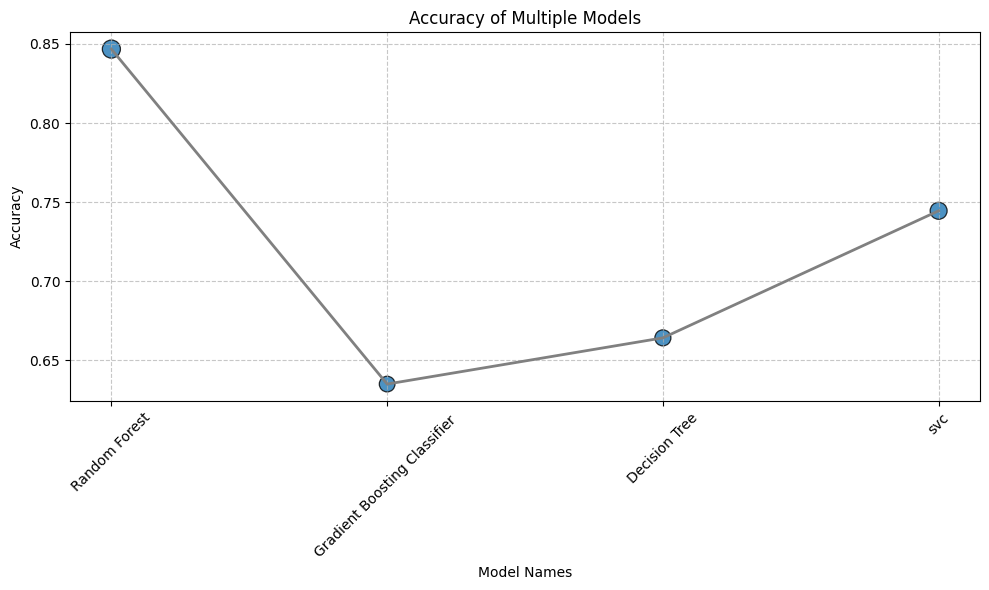

In [17]:
import seaborn as sns
import pandas as pd

# Convert data to a DataFrame for better plotting with Seaborn
data = pd.DataFrame({'Model Names': model_names, 'Accuracy': accuracies})

# Set up the color palette
palette = sns.color_palette("viridis", len(data))

# Set up the size scaling based on accuracy values
size_scale = 200  # You can adjust this value to control the size of the markers

# Create the scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Model Names', y='Accuracy', data=data, s=data['Accuracy'] * size_scale,
                palette=palette, edgecolor='black', alpha=0.8)

sns.lineplot(x='Model Names', y='Accuracy', data=data, sort=False, linewidth=2, color='grey')

plt.xlabel("Model Names")
plt.ylabel("Accuracy")
plt.title("Accuracy of Multiple Models")
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
